# Loan Approval Prediction

***
# <a name="Problem">1.Problem statement</a>

- A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a data set.

***
# <a name="data">2.Data Collection</a>

The data have already been uploaded on my [Github account](https://github.com/Rajan-jangir/Loan-Approval-Prediction). The training set will be used for training the model, i.e. our model will learn from this data. It contains all the independent variables and the target variable. The test set contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data. There are 13 columns of features and 614 rows of records in the training set and 12 columns of features and 367 rows of records in the test set. The dataset variables are summarized as below:


| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Y/N)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| Loan approved (Y/N)                            	|

***
# <a name="eda">3.Exploratory Data Analysis (EDA)</a>
We will use Python to explore the data in order to gain a better understanding of the features and target variable. We will also analyze the data to summarize their main characteristics, using various visualization techniques. 

In [1]:
import pandas as pd
# Reading the training dataset in a dataframe using Pandas
train = pd.read_csv(r"C:\Users\Administrator\Desktop\train.csv")

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv(r"C:\Users\Administrator\Desktop\test.csv")

In [2]:
# top 5 rows of the train dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# top 5 rows of the test dataset
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
# make a copy of test dataset so we will not loss our data
test_original = test.copy()

In [5]:
# show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((614, 13), (367, 12))

In [6]:
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

**Note: ** There are 13 columns of features and 614 rows of records in the train set and 12 columns of features and 367 rows of records in the test set.The features are similar in the test set as the train data except the Loan_Status. We will predict the Loan_Status using the model built using the train data.

In [7]:
# show the data types for each column of the train set
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Note: ** There are 3 data types in the data
- object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
- int64: It represents the integer variables. ApplicantIncome is of this format.
- float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

### Target Variable (Categorical)
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [9]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
# Loan approval rates in absolute numbers
loan_approval = train['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


- 422 number of loans were approved.

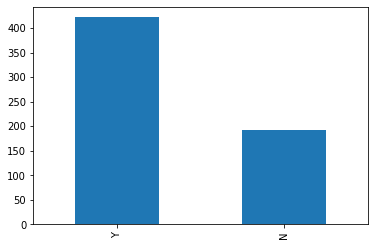

In [11]:
# bar plot to visualize the frequency
%matplotlib inline
train['Loan_Status'].value_counts().plot.bar()

### Independent Variable (Categorical)
There are 5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

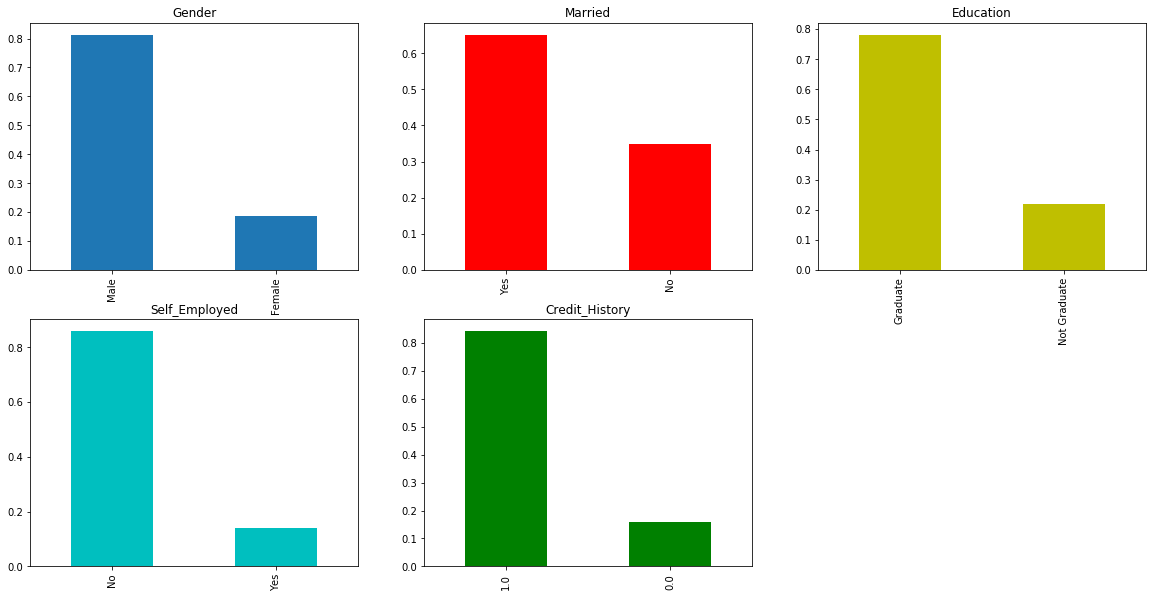

In [12]:
# Visualizing categorical features
# plt.figure(1)
import matplotlib.pyplot as plt
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color='r')

plt.subplot(233)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education',color='y')

plt.subplot(234)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color='c')

plt.subplot(235)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color='g')

plt.show()

It can be inferred from the above bar plots that:

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have credit history (repaid their debts).
- Around 80% of the applicants are Graduate.

### Independent Variable (Ordinal)
There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

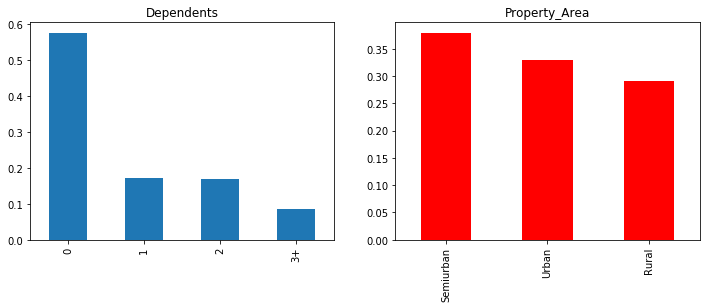

In [13]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area',color='r')

plt.show()

Following inferences can be made from the above bar plots:

- More than half of the applicants don’t have any dependents.
- Most of the applicants are from Semiurban area.

### Independent Variable (Numerical)
There are 4 features that are Numerical: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Firstly, let’s look at the Applicant income distribution:

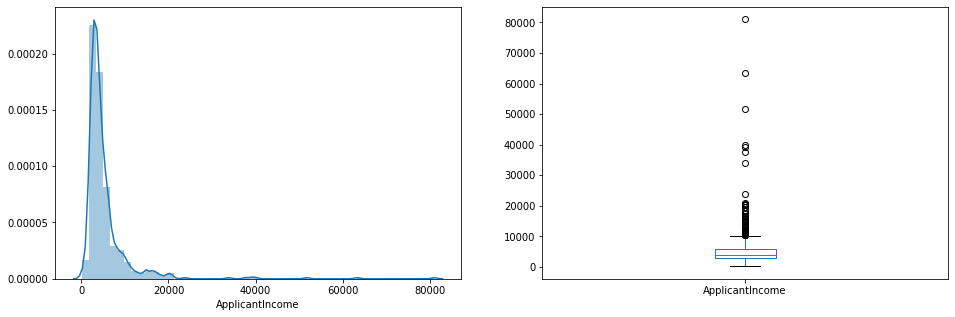

In [14]:
# Visualizing ApplicantIncome
# plt.figure(1)
import seaborn as sns
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

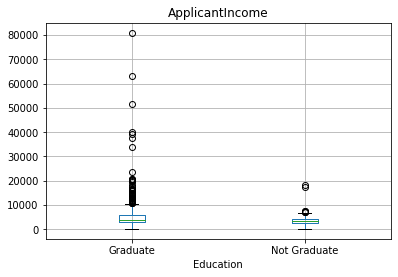

In [15]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Secondly, Let’s look at the Coapplicant income distribution.

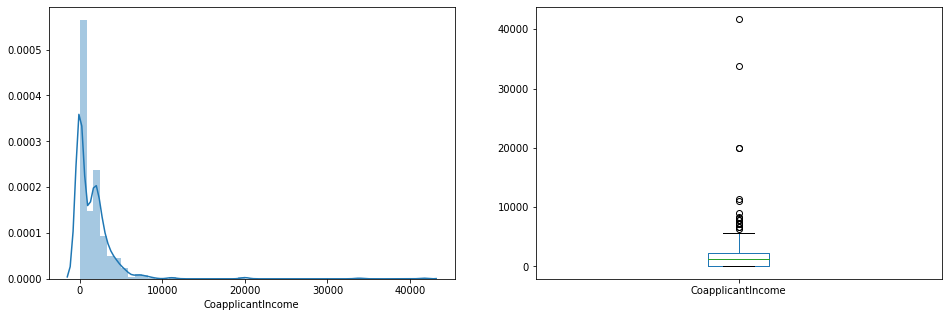

In [16]:
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Thirdly, let’s look at the distribution of LoanAmount variable.

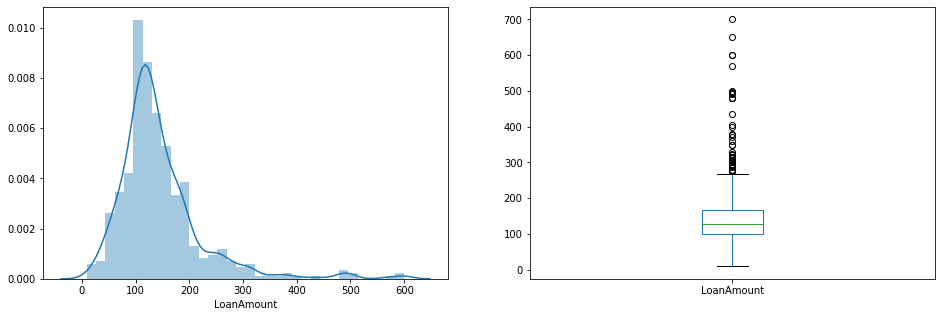

In [17]:
# plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a fairly normal distribution (albeit still slightly right-skewed) for LoanAmount but there are lot of outliers in this variable. We will treat the outliers in later sections.

Lastly, let’s look at the distribution of Loan_Amount_Term variable. Since Loan_Amount_Term is a discrete variable, we will use frequency table and bar plots which will calculate the number of each category.

In [18]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

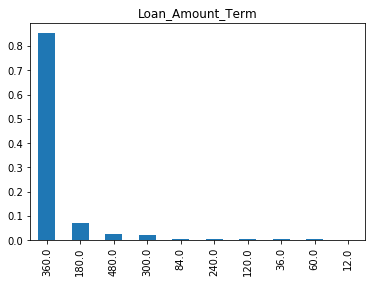

In [19]:
# plot bar chart
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

It can be inferred from the above bar plot that:

- Around 85% of the loans are 360 months term or 30 years period


Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

***
# <a name="eda">4.Data Preparation for Model Building</a>

- sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset.

In [20]:
X = train.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y = train['Loan_Status'].map({'Y':1,'N':0})

In [21]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [22]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [23]:
# calculating NaN values
X.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [24]:
# remove all NaN values
col = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for i in col:
    X[i].fillna(method='bfill',inplace=True)

In [25]:
col2=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in col2:
    X[i].fillna(method='bfill',inplace=True)

In [26]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [27]:
# check again NaN values
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [28]:
# convert all our categorical variables into numeric

X['Gender']=X['Gender'].astype(str)
X['Gender']=X['Gender'].replace({'Male':1,'Female':0})
X['Married']=X['Married'].astype(str)
X['Married']=X['Married'].replace({'Yes':1,'No':0})
X['Education']=X['Education'].astype(str)
X['Education']=X['Education'].replace({'Graduate':1,'Not Graduate':0})
X['Self_Employed']=X['Self_Employed'].astype(str)
X['Self_Employed']=X['Self_Employed'].replace({'Yes':1,'No':0})
X['Property_Area']=X['Property_Area'].astype(str)
X['Property_Area']=X['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
X['Dependents']=X['Dependents'].replace('3+',3)
X['Dependents']=X['Dependents'].astype(int)

In [29]:
train.shape

(614, 13)

- As we can see that all the missing values have been filled in the Train dataset. 
- Let’s fill all the missing values in the test dataset too with the same approach. 



In [30]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [31]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [32]:
column = ['Gender','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
for i in column:
    test[i].fillna(method='bfill',inplace=True)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [33]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [34]:
test = test.drop('Loan_ID', axis=1)

In [35]:
test['Gender']=test['Gender'].astype(str)
test['Gender']=test['Gender'].replace({'Male':1,'Female':0})
test['Married']=test['Married'].astype(str)
test['Married']=test['Married'].replace({'Yes':1,'No':0})
test['Education']=test['Education'].astype(str)
test['Education']=test['Education'].replace({'Graduate':1,'Not Graduate':0})
test['Self_Employed']=test['Self_Employed'].astype(str)
test['Self_Employed']=test['Self_Employed'].replace({'Yes':1,'No':0})
test['Property_Area']=test['Property_Area'].astype(str)
test['Property_Area']=test['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
test['Dependents']=test['Dependents'].replace('3+',3)
test['Dependents']=test['Dependents'].astype(int)

Lets import the submission file which we have to submit on the solution checker.

In [39]:
submission = pd.read_csv(r"C:\Users\Administrator\Desktop\submission.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


***
## <a name="model2">5.Model Development and Evaluation</a>


After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like DecisionTree and RandomForest.

We will build the following models in this section.

- Logistic Regression
- Decision Tree
- Random Forest

Let’s prepare the data for feeding into the models.

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
X=np.array(X)
Y=np.array(Y)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, test_size=0.3, random_state=11)

### 1.Logistic Regression 

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training accuracy: 81.0 %
testing accuracy: 79.0 %


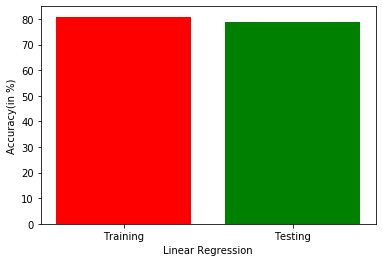

In [41]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()
lmodel.fit(xtrain,ytrain)
a = lmodel.score(xtrain,ytrain)*100
b = lmodel.score(xtest,ytest)*100
print('training accuracy:',round(lmodel.score(xtrain,ytrain)*100),'%')
print('testing accuracy:',round(lmodel.score(xtest,ytest)*100),'%')
plt.bar(['Training','Testing'],[a,b],color=['r','g'])
plt.xlabel('Linear Regression')
plt.ylabel('Accuracy(in %)')

plt.show()

In [42]:
# make prediction on test set
lpred_test = lmodel.predict(test)

# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = lpred_test
submission['Loan_ID'] = test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# Converting submission file to .csv format
submission.to_csv('Log2.csv', index=False)

### 2.Decision Tree 

training accuracy: 100.0 %
testing accuracy: 71.0 %


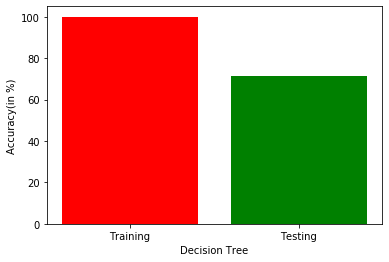

In [43]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dmodel = DecisionTreeClassifier()
dmodel.fit(xtrain,ytrain)
c = dmodel.score(xtrain,ytrain)*100
d = dmodel.score(xtest,ytest)*100
print('training accuracy:',round(dmodel.score(xtrain,ytrain)*100),'%')
print('testing accuracy:',round(dmodel.score(xtest,ytest)*100),'%')
plt.bar(['Training','Testing'],[c,d],color=['r','g'])
plt.xlabel('Decision Tree')
plt.ylabel('Accuracy(in %)')

plt.show()

In [44]:
# make prediction on test set
dpred_test = dmodel.predict(test)

# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = dpred_test
submission['Loan_ID'] = test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# Converting submission file to .csv format
submission.to_csv('Decision Tree.csv', index=False)

### 3.Random Forest

training accuracy: 100.0 %
testing accuracy: 77.0 %


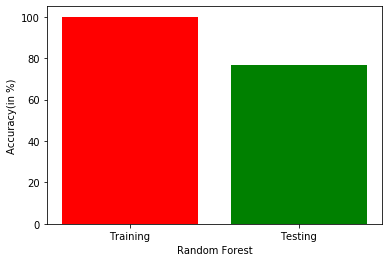

In [45]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(n_estimators=200)
rmodel.fit(xtrain,ytrain)
e = rmodel.score(xtrain,ytrain)*100
f = rmodel.score(xtest,ytest)*100
print('training accuracy:',round(rmodel.score(xtrain,ytrain)*100),'%')
print('testing accuracy:',round(rmodel.score(xtest,ytest)*100),'%')
plt.bar(['Training','Testing'],[e,f],color=['r','g'])
plt.xlabel('Random Forest')
plt.ylabel('Accuracy(in %)')

plt.show()

In [49]:
# make prediction on test set
rpred_test = rmodel.predict(test)

# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = rpred_test
submission['Loan_ID'] = test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# Converting submission file to .csv format
submission.to_csv('Random Forest.csv', index=False)

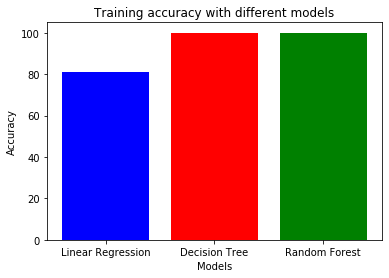

In [50]:
import matplotlib.pyplot as plt
plt.bar(['Linear Regression','Decision Tree','Random Forest'],[a,c,e],color=['b','r','g'])
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.title('Training accuracy with different models')

plt.show()

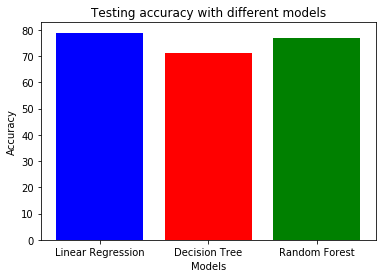

In [51]:
plt.bar(['Linear Regression','Decision Tree','Random Forest'],[b,d,f], label="Testing accuracy",color=['b','r','g'])
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.title('Testing accuracy with different models')
plt.show()


***
# <a name="conclusion">6.Conclusion</a>

After trying and testing 3 different algorithms, the best accuracy on the public leaderboard is achieved by Logistic Regression (79%), followed by RandomForest (77%) and Decision Tree performed the worst (70). On the whole, a logistic regression classifier provides the best result in terms of accuracy for the given dataset, without any feature engineering needed. Because of its simplicity and the fact that it can be implemented relatively easy and quick, Logistic Regression is often a good baseline that data scientists can use to measure the performance of other more complex algorithms. In this case, however, a basic Logistic Regression has already outperformed other more complex algorithms like Random Forest and Decision Tree, for the given dataset.

- In summary, this project is helpful to me in understanding how to build a machine learning model and what are the steps one should go through to build a robust model. If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/rajan-jangir-374a97173/).